In [2]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util
import plot as sds_plt

import numpy as np
#import cupy as cp
import scipy as sp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pyshtools
import pickle

comment = "Compare conditional to unconditional realizations"
nb_name = "nb_seqsim_core_unconditional_compare"

# Core

In [3]:
core = SDSS(comment, N_SH = 30, sim_type = "core", sat_height = 350)

core.grid_glq(nmax = 30, r_at = core.r_cmb)

grid_in = np.array([core.grid_glq_phi, 90-core.grid_glq_theta]).T
core.make_grid(core.r_cmb, grid_in, calc_sph_d = True)


In [4]:
core.generate_map(target_var_factor = 1)

In [5]:
#core.data = core.data - np.mean(core.data)

In [6]:
#mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
#                            data=core.data, point_size=10, shift_grid = True, 
#                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
#                            title="Prior radial lithosphere information")

In [7]:
core.condtab(normsize=10000, quantiles = 1000, 
             rangn_lim = 3.5, rangn_N = 101, rangv_lim = 2.0, rangv_N = 101)

____semi-variogram setup___

Number of data used: 3575881
Max data distance: 10919.075 km
Lag length chosen: 200.0 km
Number of lags: 54
Number of modelling lags: all

Semi-variogram model determined, starting LUT computation

____semi-variogram setup___

Number of data used: 3575881
Max data distance: 10919.075 km
Lag length chosen: 200.0 km
Number of lags: 54
Number of modelling lags: 20

Semi-variogram model determined, starting LUT computation



<IPython.core.display.Javascript object>


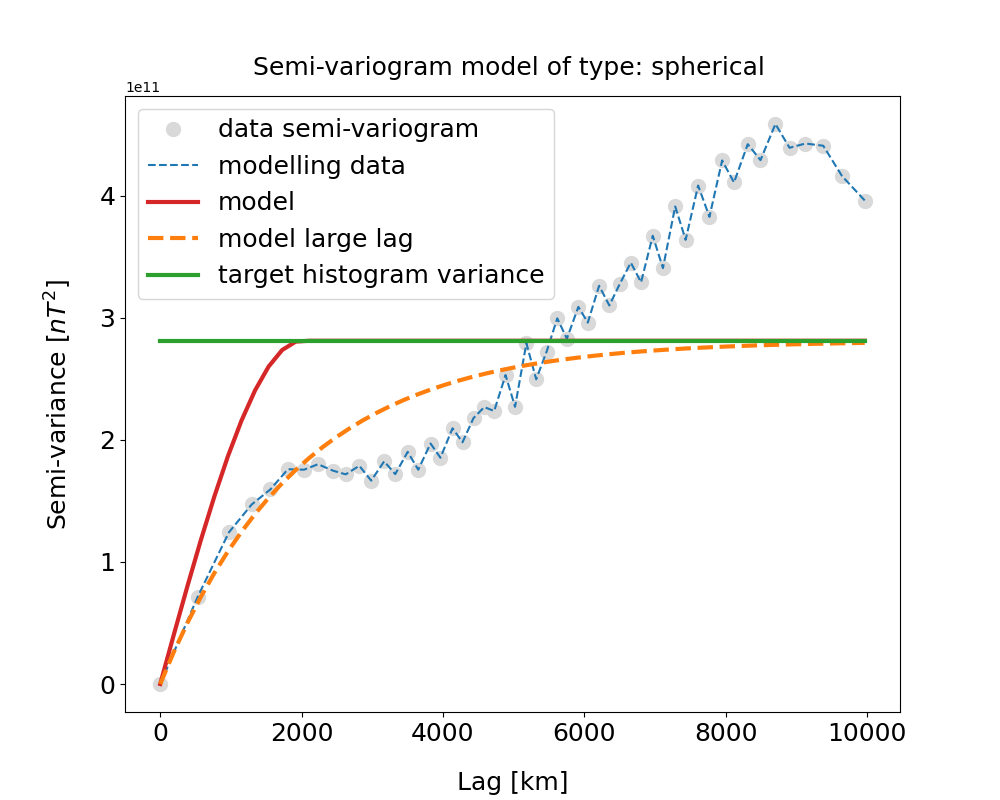

In [8]:
core.semivar(model_lags = "all", model = "exponential", max_dist = 20000, lag_length = 200,
             zero_nugget = True, hit_target_var = True)

keep_sv_curve = core.sv_curve.copy()
keep_lags_sv_curve = core.lags_sv_curve.copy()

C_e_const = 2.0

nugget = C_e_const**2
nugget_p = 0.01
var_fac = 1.0

#set_model = {"a": 2000, "C0": var_fac*core.target_var*nugget_p, "C1": var_fac*core.target_var*(1-nugget_p), "C2": None, "C3": None}
set_model = {"a": 2000, "C0": nugget, "C1": var_fac*core.target_var-nugget, "C2": None, "C3": None}


core.semivar(model_lags = 20, model = "spherical", max_dist = 20000, lag_length = 200,
             zero_nugget = True, hit_target_var = True, set_model = set_model)

#core.semivar(model_lags = 3, model = "exponential", max_dist = 20000, lag_length = 200,
#             zero_nugget = True, hit_target_var = True)


#%% PLOT SEMI-VARIOGRAM
plt.figure(figsize=(10,8)) 
plt.plot(core.lags,core.pics,'o', markersize=10,color = '0.85',label='data semi-variogram')
plt.plot(core.lags_model,core.pics_model,'--',markersize=10,label='modelling data')
plt.plot(core.lags_sv_curve,core.sv_curve,color='C3', linewidth = 3,label='model')
plt.plot(keep_lags_sv_curve,keep_sv_curve,"--",color='C1',linewidth = 3,label='model large lag')

plt.plot(core.lags_sv_curve,np.ones(core.lags_sv_curve.shape)*core.target_var,linewidth = 3, color="C2", label="target histogram variance")
plt.ylabel('Semi-variance $[%s^2]$' % "nT",fontsize=18,labelpad=18)
plt.xlabel('Lag [km]',fontsize=18,labelpad=18)
plt.title("Semi-variogram model of type: %s " % core.model_names[core.model],fontsize=18,y=1.02)
plt.legend(loc='best',fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.show()

In [10]:
#print(core)

# Synthetic sat

In [9]:
s_sat = SDSS(comment, N_SH = 30, sim_type = "core", sat_height = 350, N_SH_secondary = None)

s_sat.load_swarm("A")

grid_in = np.array([s_sat.swarm_phi, 90-s_sat.swarm_theta]).T
s_sat.make_grid(s_sat.swarm_radius, grid_in, calc_sph_d = False)

#s_sat.grid_equal_area(N_grid= 500, r_at = s_sat.r_sat, poles_remove = True)
#grid_in = np.array([s_sat.grid_eqa_phi, 90-s_sat.grid_eqa_theta]).T
#s_sat.grid(s_sat.r_sat, grid_in, calc_sph_d = False)

In [10]:
s_sat.generate_map(grid_type = "swarm")

In [11]:
s_sat.data += np.random.normal(scale = C_e_const, size = s_sat.data.shape)

In [12]:
#mt_util.plot_cartopy_global(lat = s_sat.lat, lon = s_sat.lon, plot_quality = "high", point_size=5, 
#                            data=s_sat.data, cmap = 'PuOr_r', title="Synthetic satellite data")

In [13]:
#print(s_sat)


Gauss-Legendre RMSE:	 1.962123069494


<IPython.core.display.Javascript object>


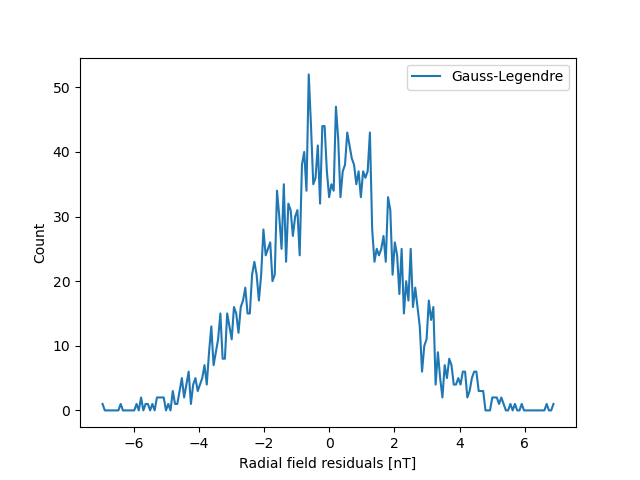

In [14]:
core.integrating_kernel(s_sat, C_e_const = C_e_const)

 |OOOOOOOOOO| 100.0%   realization nr. 0. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.325 minutes 
Total elapsed time: 8.325 minutes 
Variance: 277898779300.143
Mean: -8778.849
Max: 1867053.330
Min: -1415536.415
Run nr.: 1

 |OOOOOOOOOO| 100.0%   realization nr. 1. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.281 minutes 
Total elapsed time: 16.606 minutes 
Variance: 273988632009.537
Mean: -8829.237
Max: 1750420.369
Min: -1413690.746
Run nr.: 2

 |OOOOOOOOOO| 100.0%   realization nr. 2. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.299 minutes 
Total elapsed time: 24.905 minutes 
Variance: 274002934182.137
Mean: -7677.131
Max: 1798422.985
Min: -1460749.007
Run nr.: 3

 |OOOOOOOOOO| 100.0%   realization nr. 3. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.332 minutes 
Total elapsed time: 33.238 minutes 
Variance: 273231817930.483
Mean: -6485.746
Max: 1867773.015
Min: -1356234.491
Run nr.: 4

 |OOOOOOOOOO| 100.0%   realizatio

 |OOOOOOOOOO| 100.0%   realization nr. 34. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.293 minutes 
Total elapsed time: 4.863 hours 
Variance: 269189343749.571
Mean: -9214.796
Max: 1908927.511
Min: -1510446.420
Run nr.: 35

 |OOOOOOOOOO| 100.0%   realization nr. 35. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.257 minutes 
Total elapsed time: 5.001 hours 
Variance: 273124219419.044
Mean: -7275.747
Max: 1826933.354
Min: -1346637.897
Run nr.: 36

 |OOOOOOOOOO| 100.0%   realization nr. 36. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.254 minutes 
Total elapsed time: 5.138 hours 
Variance: 272834220365.478
Mean: -7599.161
Max: 1730877.784
Min: -1450380.630
Run nr.: 37

 |OOOOOOOOOO| 100.0%   realization nr. 37. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.244 minutes 
Total elapsed time: 5.276 hours 
Variance: 272818443875.451
Mean: -11304.599
Max: 1925545.751
Min: -1507050.585
Run nr.: 38

 |OOOOOOOOOO| 100.0%   realization 

 |OOOOOOOOOO| 100.0%   realization nr. 68. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.298 minutes 
Total elapsed time: 9.566 hours 
Variance: 271934443866.781
Mean: -7172.415
Max: 1723570.350
Min: -1471525.413
Run nr.: 69

 |OOOOOOOOOO| 100.0%   realization nr. 69. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.305 minutes 
Total elapsed time: 9.704 hours 
Variance: 269200983726.173
Mean: -12680.710
Max: 1851891.154
Min: -1377314.340
Run nr.: 70

 |OOOOOOOOOO| 100.0%   realization nr. 70. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.307 minutes 
Total elapsed time: 9.843 hours 
Variance: 273113801557.011
Mean: -7467.823
Max: 1828903.536
Min: -1471264.186
Run nr.: 71

 |OOOOOOOOOO| 100.0%   realization nr. 71. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.326 minutes 
Total elapsed time: 9.981 hours 
Variance: 277905850895.155
Mean: -6654.789
Max: 1985660.819
Min: -1480443.607
Run nr.: 72

 |OOOOOOOOOO| 100.0%   realization 

 |OOOOOOOOOO| 100.0%   realization nr. 102. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.272 minutes 
Total elapsed time: 14.288 hours 
Variance: 268958297460.028
Mean: -9343.506
Max: 1826656.848
Min: -1352876.374
Run nr.: 103

 |OOOOOOOOOO| 100.0%   realization nr. 103. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.379 minutes 
Total elapsed time: 14.427 hours 
Variance: 277624099822.581
Mean: -7183.755
Max: 1671293.946
Min: -1496564.687
Run nr.: 104

 |OOOOOOOOOO| 100.0%   realization nr. 104. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.304 minutes 
Total elapsed time: 14.566 hours 
Variance: 276930921278.850
Mean: -5540.507
Max: 1935096.412
Min: -1629067.786
Run nr.: 105

 |OOOOOOOOOO| 100.0%   realization nr. 105. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.352 minutes 
Total elapsed time: 14.705 hours 
Variance: 272201851907.467
Mean: -8633.105
Max: 1636165.736
Min: -1620465.817
Run nr.: 106

 |OOOOOOOOOO| 100.0%   r

 |OOOOOOOOOO| 100.0%   realization nr. 136. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.229 minutes 
Total elapsed time: 19.010 hours 
Variance: 271103313004.986
Mean: -8988.495
Max: 1885102.600
Min: -1486551.692
Run nr.: 137

 |OOOOOOOOOO| 100.0%   realization nr. 137. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.235 minutes 
Total elapsed time: 19.147 hours 
Variance: 271652725057.729
Mean: -8920.932
Max: 1649851.007
Min: -1491859.515
Run nr.: 138

 |OOOOOOOOOO| 100.0%   realization nr. 138. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.270 minutes 
Total elapsed time: 19.285 hours 
Variance: 275937341579.210
Mean: -5868.798
Max: 1728443.288
Min: -1356075.577
Run nr.: 139

 |OOOOOOOOOO| 100.0%   realization nr. 139. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.250 minutes 
Total elapsed time: 19.423 hours 
Variance: 273671994685.630
Mean: -7542.306
Max: 1662460.643
Min: -1531301.845
Run nr.: 140

 |OOOOOOOOOO| 100.0%   r

 |OOOOOOOOOO| 100.0%   realization nr. 170. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.376 minutes 
Total elapsed time: 23.732 hours 
Variance: 277913037616.156
Mean: -7069.458
Max: 1792714.312
Min: -1393228.263
Run nr.: 171

 |OOOOOOOOOO| 100.0%   realization nr. 171. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.301 minutes 
Total elapsed time: 23.870 hours 
Variance: 276430349163.333
Mean: -11299.157
Max: 1795282.926
Min: -1341846.359
Run nr.: 172

 |OOOOOOOOOO| 100.0%   realization nr. 172. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.273 minutes 
Total elapsed time: 24.008 hours 
Variance: 273619147784.596
Mean: -8581.848
Max: 1768934.169
Min: -1572182.582
Run nr.: 173

 |OOOOOOOOOO| 100.0%   realization nr. 173. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.276 minutes 
Total elapsed time: 24.146 hours 
Variance: 275609953865.003
Mean: -7753.979
Max: 1849628.299
Min: -1539279.706
Run nr.: 174

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 204. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.421 minutes 
Total elapsed time: 28.449 hours 
Variance: 276733915731.790
Mean: -11812.072
Max: 1751712.835
Min: -1564955.118
Run nr.: 205

 |OOOOOOOOOO| 100.0%   realization nr. 205. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.377 minutes 
Total elapsed time: 28.589 hours 
Variance: 275047305712.415
Mean: -6163.765
Max: 1847269.401
Min: -1489412.686
Run nr.: 206

 |OOOOOOOOOO| 100.0%   realization nr. 206. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.352 minutes 
Total elapsed time: 28.728 hours 
Variance: 270127145767.288
Mean: -8974.510
Max: 1777977.908
Min: -1453717.390
Run nr.: 207

 |OOOOOOOOOO| 100.0%   realization nr. 207. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.363 minutes 
Total elapsed time: 28.868 hours 
Variance: 274267283729.215
Mean: -9782.411
Max: 1602889.582
Min: -1471536.328
Run nr.: 208

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 238. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.343 minutes 
Total elapsed time: 33.162 hours 
Variance: 275485586906.901
Mean: -5591.263
Max: 1633154.677
Min: -1318588.477
Run nr.: 239

 |OOOOOOOOOO| 100.0%   realization nr. 239. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.297 minutes 
Total elapsed time: 33.300 hours 
Variance: 270073928914.219
Mean: -9974.488
Max: 1730841.515
Min: -1553684.962
Run nr.: 240

 |OOOOOOOOOO| 100.0%   realization nr. 240. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.275 minutes 
Total elapsed time: 33.438 hours 
Variance: 272767336181.356
Mean: -12181.944
Max: 1832701.573
Min: -1608832.740
Run nr.: 241

 |OOOOOOOOOO| 100.0%   realization nr. 241. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.351 minutes 
Total elapsed time: 33.577 hours 
Variance: 270135058585.926
Mean: -10723.822
Max: 1788486.215
Min: -1419214.124
Run nr.: 242

 |OOOOOOOOOO| 100.0%  

 |OOOOOOOOOO| 100.0%   realization nr. 272. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.309 minutes 
Total elapsed time: 37.863 hours 
Variance: 273417201983.972
Mean: -7913.088
Max: 1794593.933
Min: -1442102.354
Run nr.: 273

 |OOOOOOOOOO| 100.0%   realization nr. 273. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.302 minutes 
Total elapsed time: 38.001 hours 
Variance: 274319738285.524
Mean: -7196.317
Max: 1901578.390
Min: -1271722.368
Run nr.: 274

 |OOOOOOOOOO| 100.0%   realization nr. 274. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.308 minutes 
Total elapsed time: 38.139 hours 
Variance: 271730781223.858
Mean: -10681.918
Max: 1553805.077
Min: -1519413.595
Run nr.: 275

 |OOOOOOOOOO| 100.0%   realization nr. 275. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.301 minutes 
Total elapsed time: 38.278 hours 
Variance: 270823413863.180
Mean: -8749.438
Max: 1846830.734
Min: -1543409.764
Run nr.: 276

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 306. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.234 minutes 
Total elapsed time: 42.564 hours 
Variance: 264193845229.867
Mean: -11612.114
Max: 1749745.837
Min: -1599583.982
Run nr.: 307

 |OOOOOOOOOO| 100.0%   realization nr. 307. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.251 minutes 
Total elapsed time: 42.701 hours 
Variance: 267990754210.512
Mean: -10620.960
Max: 1803671.696
Min: -1310846.067
Run nr.: 308

 |OOOOOOOOOO| 100.0%   realization nr. 308. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.292 minutes 
Total elapsed time: 42.840 hours 
Variance: 275655161610.199
Mean: -10985.570
Max: 1862947.634
Min: -1301285.445
Run nr.: 309

 |OOOOOOOOOO| 100.0%   realization nr. 309. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.268 minutes 
Total elapsed time: 42.977 hours 
Variance: 278101661862.918
Mean: -7669.330
Max: 1593716.997
Min: -1489262.029
Run nr.: 310

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 340. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.282 minutes 
Total elapsed time: 47.263 hours 
Variance: 272496297838.628
Mean: -10834.021
Max: 1710043.571
Min: -1403568.054
Run nr.: 341

 |OOOOOOOOOO| 100.0%   realization nr. 341. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.347 minutes 
Total elapsed time: 47.403 hours 
Variance: 273345238193.034
Mean: -10649.354
Max: 1787428.041
Min: -1515190.852
Run nr.: 342

 |OOOOOOOOOO| 100.0%   realization nr. 342. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.300 minutes 
Total elapsed time: 47.541 hours 
Variance: 277531259107.306
Mean: -6265.860
Max: 1861019.763
Min: -1366201.939
Run nr.: 343

 |OOOOOOOOOO| 100.0%   realization nr. 343. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.310 minutes 
Total elapsed time: 47.679 hours 
Variance: 268183700808.174
Mean: -10977.218
Max: 1661029.066
Min: -1388566.208
Run nr.: 344

 |OOOOOOOOOO| 100.0% 

 |OOOOOOOOOO| 100.0%   realization nr. 374. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.296 minutes 
Total elapsed time: 51.979 hours 
Variance: 274077627149.357
Mean: -7072.774
Max: 1776465.386
Min: -1503890.971
Run nr.: 375

 |OOOOOOOOOO| 100.0%   realization nr. 375. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.289 minutes 
Total elapsed time: 52.117 hours 
Variance: 275519798999.236
Mean: -7362.153
Max: 1729058.943
Min: -1387117.634
Run nr.: 376

 |OOOOOOOOOO| 100.0%   realization nr. 376. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.361 minutes 
Total elapsed time: 52.256 hours 
Variance: 270818859641.183
Mean: -9896.906
Max: 1683418.947
Min: -1562908.523
Run nr.: 377

 |OOOOOOOOOO| 100.0%   realization nr. 377. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.321 minutes 
Total elapsed time: 52.395 hours 
Variance: 275737265581.678
Mean: -7327.511
Max: 2009848.639
Min: -1606650.182
Run nr.: 378

 |OOOOOOOOOO| 100.0%   r

 |OOOOOOOOOO| 100.0%   realization nr. 408. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.397 minutes 
Total elapsed time: 56.699 hours 
Variance: 272217817509.334
Mean: -8251.254
Max: 1708676.207
Min: -1594699.883
Run nr.: 409

 |OOOOOOOOOO| 100.0%   realization nr. 409. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.351 minutes 
Total elapsed time: 56.838 hours 
Variance: 272531204264.387
Mean: -9212.500
Max: 1593147.262
Min: -1572840.313
Run nr.: 410

 |OOOOOOOOOO| 100.0%   realization nr. 410. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.470 minutes 
Total elapsed time: 56.980 hours 
Variance: 277761162352.405
Mean: -8439.127
Max: 1843822.566
Min: -1552874.283
Run nr.: 411

 |OOOOOOOOOO| 100.0%   realization nr. 411. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.392 minutes 
Total elapsed time: 57.119 hours 
Variance: 274671000457.910
Mean: -12291.190
Max: 1869561.195
Min: -1573161.455
Run nr.: 412

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 442. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.285 minutes 
Total elapsed time: 61.427 hours 
Variance: 270974428941.367
Mean: -8468.450
Max: 1660916.647
Min: -1328576.076
Run nr.: 443

 |OOOOOOOOOO| 100.0%   realization nr. 443. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.302 minutes 
Total elapsed time: 61.566 hours 
Variance: 281796719289.530
Mean: -11720.559
Max: 1630167.416
Min: -1391409.445
Run nr.: 444

 |OOOOOOOOOO| 100.0%   realization nr. 444. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.309 minutes 
Total elapsed time: 61.704 hours 
Variance: 276069998838.725
Mean: -6974.492
Max: 1716281.682
Min: -1492761.573
Run nr.: 445

 |OOOOOOOOOO| 100.0%   realization nr. 445. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.257 minutes 
Total elapsed time: 61.842 hours 
Variance: 277231151498.690
Mean: -9195.959
Max: 1803524.396
Min: -1648229.830
Run nr.: 446

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 476. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.258 minutes 
Total elapsed time: 66.135 hours 
Variance: 270906122088.937
Mean: -12182.532
Max: 1944556.288
Min: -1272981.165
Run nr.: 477

 |OOOOOOOOOO| 100.0%   realization nr. 477. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.277 minutes 
Total elapsed time: 66.273 hours 
Variance: 273580383095.633
Mean: -7105.397
Max: 1839613.480
Min: -1354728.195
Run nr.: 478

 |OOOOOOOOOO| 100.0%   realization nr. 478. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.361 minutes 
Total elapsed time: 66.413 hours 
Variance: 266372090066.457
Mean: -8228.024
Max: 1567387.744
Min: -1636928.085
Run nr.: 479

 |OOOOOOOOOO| 100.0%   realization nr. 479. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.291 minutes 
Total elapsed time: 66.551 hours 
Variance: 274696542230.944
Mean: -9316.222
Max: 1809694.833
Min: -1564358.434
Run nr.: 480

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 510. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.316 minutes 
Total elapsed time: 70.841 hours 
Variance: 277594396752.572
Mean: -9847.707
Max: 1801745.455
Min: -1622578.815
Run nr.: 511

 |OOOOOOOOOO| 100.0%   realization nr. 511. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.303 minutes 
Total elapsed time: 70.979 hours 
Variance: 279450073501.269
Mean: -2604.618
Max: 1667110.252
Min: -1482813.305
Run nr.: 512

 |OOOOOOOOOO| 100.0%   realization nr. 512. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.375 minutes 
Total elapsed time: 71.119 hours 
Variance: 280869721896.214
Mean: -5412.420
Max: 1701912.676
Min: -1550065.143
Run nr.: 513

 |OOOOOOOOOO| 100.0%   realization nr. 513. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.315 minutes 
Total elapsed time: 71.257 hours 
Variance: 272760282520.328
Mean: -8784.594
Max: 1677330.556
Min: -1421409.922
Run nr.: 514

 |OOOOOOOOOO| 100.0%   r

 |OOOOOOOOOO| 100.0%   realization nr. 544. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.267 minutes 
Total elapsed time: 75.537 hours 
Variance: 271421981911.651
Mean: -7675.889
Max: 1851705.521
Min: -1191932.372
Run nr.: 545

 |OOOOOOOOOO| 100.0%   realization nr. 545. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.264 minutes 
Total elapsed time: 75.674 hours 
Variance: 270004738926.628
Mean: -8617.294
Max: 1805161.759
Min: -1533089.034
Run nr.: 546

 |OOOOOOOOOO| 100.0%   realization nr. 546. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.325 minutes 
Total elapsed time: 75.813 hours 
Variance: 273253383519.597
Mean: -10883.886
Max: 1909846.454
Min: -1542240.107
Run nr.: 547

 |OOOOOOOOOO| 100.0%   realization nr. 547. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.325 minutes 
Total elapsed time: 75.952 hours 
Variance: 276476225398.728
Mean: -9353.972
Max: 2175846.981
Min: -1409171.077
Run nr.: 548

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 578. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.263 minutes 
Total elapsed time: 80.228 hours 
Variance: 272273583289.712
Mean: -9957.560
Max: 1892280.262
Min: -1598602.632
Run nr.: 579

 |OOOOOOOOOO| 100.0%   realization nr. 579. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.432 minutes 
Total elapsed time: 80.369 hours 
Variance: 274363574141.585
Mean: -8832.250
Max: 1799548.252
Min: -1517459.849
Run nr.: 580

 |OOOOOOOOOO| 100.0%   realization nr. 580. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.449 minutes 
Total elapsed time: 80.509 hours 
Variance: 275106841721.346
Mean: -6592.505
Max: 1890894.127
Min: -1408189.277
Run nr.: 581

 |OOOOOOOOOO| 100.0%   realization nr. 581. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.311 minutes 
Total elapsed time: 80.648 hours 
Variance: 276787075445.271
Mean: -9369.417
Max: 1708221.954
Min: -1596515.214
Run nr.: 582

 |OOOOOOOOOO| 100.0%   r

 |OOOOOOOOOO| 100.0%   realization nr. 612. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.267 minutes 
Total elapsed time: 84.932 hours 
Variance: 272053514787.686
Mean: -10137.554
Max: 2016629.539
Min: -1507768.095
Run nr.: 613

 |OOOOOOOOOO| 100.0%   realization nr. 613. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.253 minutes 
Total elapsed time: 85.070 hours 
Variance: 274199094557.836
Mean: -7992.729
Max: 2109674.157
Min: -1508678.481
Run nr.: 614

 |OOOOOOOOOO| 100.0%   realization nr. 614. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.261 minutes 
Total elapsed time: 85.208 hours 
Variance: 273537287674.996
Mean: -6874.744
Max: 1612057.168
Min: -1606234.782
Run nr.: 615

 |OOOOOOOOOO| 100.0%   realization nr. 615. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.230 minutes 
Total elapsed time: 85.345 hours 
Variance: 275736518094.798
Mean: -8031.075
Max: 1718209.362
Min: -1417899.470
Run nr.: 616

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 646. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.443 minutes 
Total elapsed time: 89.625 hours 
Variance: 272800541159.789
Mean: -8298.008
Max: 1749726.666
Min: -1626096.429
Run nr.: 647

 |OOOOOOOOOO| 100.0%   realization nr. 647. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.449 minutes 
Total elapsed time: 89.765 hours 
Variance: 270068550463.390
Mean: -8458.604
Max: 1860946.630
Min: -1493694.242
Run nr.: 648

 |OOOOOOOOOO| 100.0%   realization nr. 648. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.282 minutes 
Total elapsed time: 89.904 hours 
Variance: 277072012792.362
Mean: -4940.884
Max: 1778398.112
Min: -1450365.081
Run nr.: 649

 |OOOOOOOOOO| 100.0%   realization nr. 649. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.308 minutes 
Total elapsed time: 90.042 hours 
Variance: 276006646113.480
Mean: -6255.657
Max: 1751884.616
Min: -1539502.165
Run nr.: 650

 |OOOOOOOOOO| 100.0%   r

 |OOOOOOOOOO| 100.0%   realization nr. 680. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.259 minutes 
Total elapsed time: 94.330 hours 
Variance: 280269535972.080
Mean: -4960.783
Max: 1768510.165
Min: -1659015.404
Run nr.: 681

 |OOOOOOOOOO| 100.0%   realization nr. 681. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.284 minutes 
Total elapsed time: 94.468 hours 
Variance: 271639124591.415
Mean: -9262.147
Max: 1583338.331
Min: -1522403.412
Run nr.: 682

 |OOOOOOOOOO| 100.0%   realization nr. 682. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.255 minutes 
Total elapsed time: 94.606 hours 
Variance: 267875075095.609
Mean: -10568.858
Max: 1541626.672
Min: -1648112.139
Run nr.: 683

 |OOOOOOOOOO| 100.0%   realization nr. 683. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.255 minutes 
Total elapsed time: 94.744 hours 
Variance: 275796328422.870
Mean: -9468.833
Max: 1970488.294
Min: -1574904.207
Run nr.: 684

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 714. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.232 minutes 
Total elapsed time: 99.032 hours 
Variance: 271773094642.748
Mean: -9075.021
Max: 1986333.734
Min: -1348410.819
Run nr.: 715

 |OOOOOOOOOO| 100.0%   realization nr. 715. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.282 minutes 
Total elapsed time: 99.170 hours 
Variance: 269460049589.633
Mean: -8294.745
Max: 1575707.067
Min: -1550488.290
Run nr.: 716

 |OOOOOOOOOO| 100.0%   realization nr. 716. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.231 minutes 
Total elapsed time: 99.307 hours 
Variance: 273413329626.313
Mean: -9196.974
Max: 1952016.264
Min: -1606775.465
Run nr.: 717

 |OOOOOOOOOO| 100.0%   realization nr. 717. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.344 minutes 
Total elapsed time: 99.446 hours 
Variance: 272082069693.876
Mean: -11824.380
Max: 1879048.875
Min: -1591678.459
Run nr.: 718

 |OOOOOOOOOO| 100.0%   

 |OOOOOOOOOO| 100.0%   realization nr. 748. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.282 minutes 
Total elapsed time: 103.749 hours 
Variance: 272521140997.554
Mean: -7324.692
Max: 1837815.323
Min: -1266462.314
Run nr.: 749

 |OOOOOOOOOO| 100.0%   realization nr. 749. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.298 minutes 
Total elapsed time: 103.888 hours 
Variance: 275469272417.987
Mean: -10731.460
Max: 1778471.715
Min: -1463911.071
Run nr.: 750

 |OOOOOOOOOO| 100.0%   realization nr. 750. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.324 minutes 
Total elapsed time: 104.026 hours 
Variance: 275108837746.662
Mean: -7199.561
Max: 1813660.058
Min: -1555948.564
Run nr.: 751

 |OOOOOOOOOO| 100.0%   realization nr. 751. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.295 minutes 
Total elapsed time: 104.165 hours 
Variance: 274421261844.814
Mean: -9696.353
Max: 1717965.231
Min: -1621096.865
Run nr.: 752

 |OOOOOOOOOO| 100.0

 |OOOOOOOOOO| 100.0%   realization nr. 782. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.265 minutes 
Total elapsed time: 108.443 hours 
Variance: 276368087575.784
Mean: -7580.423
Max: 1856092.168
Min: -1512769.943
Run nr.: 783

 |OOOOOOOOOO| 100.0%   realization nr. 783. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.276 minutes 
Total elapsed time: 108.580 hours 
Variance: 271677861327.016
Mean: -9507.380
Max: 1879864.544
Min: -1560483.694
Run nr.: 784

 |OOOOOOOOOO| 100.0%   realization nr. 784. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.266 minutes 
Total elapsed time: 108.718 hours 
Variance: 272383598175.107
Mean: -7159.755
Max: 1825939.103
Min: -1383227.817
Run nr.: 785

 |OOOOOOOOOO| 100.0%   realization nr. 785. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.228 minutes 
Total elapsed time: 108.855 hours 
Variance: 270001635112.077
Mean: -10027.160
Max: 1903319.513
Min: -1350994.211
Run nr.: 786

 |OOOOOOOOOO| 100.0

 |OOOOOOOOOO| 100.0%   realization nr. 816. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.250 minutes 
Total elapsed time: 113.135 hours 
Variance: 276758195619.548
Mean: -8961.873
Max: 1846157.545
Min: -1390966.515
Run nr.: 817

 |OOOOOOOOOO| 100.0%   realization nr. 817. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.334 minutes 
Total elapsed time: 113.274 hours 
Variance: 272519739611.425
Mean: -9595.930
Max: 1933912.260
Min: -1256963.551
Run nr.: 818

 |OOOOOOOOOO| 100.0%   realization nr. 818. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.268 minutes 
Total elapsed time: 113.412 hours 
Variance: 270661429554.533
Mean: -9373.068
Max: 1885986.140
Min: -1390853.545
Run nr.: 819

 |OOOOOOOOOO| 100.0%   realization nr. 819. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.254 minutes 
Total elapsed time: 113.549 hours 
Variance: 274047819381.588
Mean: -9268.523
Max: 1842055.478
Min: -1632377.831
Run nr.: 820

 |OOOOOOOOOO| 100.0%

 |OOOOOOOOOO| 100.0%   realization nr. 850. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.302 minutes 
Total elapsed time: 117.832 hours 
Variance: 274943482029.076
Mean: -10210.497
Max: 1775673.056
Min: -1556067.397
Run nr.: 851

 |OOOOOOOOOO| 100.0%   realization nr. 851. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.251 minutes 
Total elapsed time: 117.970 hours 
Variance: 270993813474.618
Mean: -9519.006
Max: 1844400.518
Min: -1601857.893
Run nr.: 852

 |OOOOOOOOOO| 100.0%   realization nr. 852. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.260 minutes 
Total elapsed time: 118.107 hours 
Variance: 278649262143.963
Mean: -6722.711
Max: 1963963.765
Min: -1416951.279
Run nr.: 853

 |OOOOOOOOOO| 100.0%   realization nr. 853. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.257 minutes 
Total elapsed time: 118.245 hours 
Variance: 279383842804.806
Mean: -10532.373
Max: 1927547.352
Min: -1651195.865
Run nr.: 854

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 884. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.293 minutes 
Total elapsed time: 122.537 hours 
Variance: 275708952348.114
Mean: -7127.973
Max: 1846812.551
Min: -1258355.602
Run nr.: 885

 |OOOOOOOOOO| 100.0%   realization nr. 885. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.277 minutes 
Total elapsed time: 122.675 hours 
Variance: 275844418650.661
Mean: -4616.277
Max: 1668626.388
Min: -1510905.822
Run nr.: 886

 |OOOOOOOOOO| 100.0%   realization nr. 886. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.287 minutes 
Total elapsed time: 122.813 hours 
Variance: 268334245847.648
Mean: -8297.539
Max: 1803636.453
Min: -1416441.393
Run nr.: 887

 |OOOOOOOOOO| 100.0%   realization nr. 887. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.297 minutes 
Total elapsed time: 122.952 hours 
Variance: 276007095799.379
Mean: -6324.561
Max: 1643701.449
Min: -1374013.891
Run nr.: 888

 |OOOOOOOOOO| 100.0%

 |OOOOOOOOOO| 100.0%   realization nr. 918. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.269 minutes 
Total elapsed time: 127.231 hours 
Variance: 275182939654.463
Mean: -6938.375
Max: 1785086.101
Min: -1537466.990
Run nr.: 919

 |OOOOOOOOOO| 100.0%   realization nr. 919. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.299 minutes 
Total elapsed time: 127.369 hours 
Variance: 267293798331.960
Mean: -9456.899
Max: 1644316.995
Min: -1419214.466
Run nr.: 920

 |OOOOOOOOOO| 100.0%   realization nr. 920. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.276 minutes 
Total elapsed time: 127.507 hours 
Variance: 270380576258.120
Mean: -11289.346
Max: 1567991.834
Min: -1350196.878
Run nr.: 921

 |OOOOOOOOOO| 100.0%   realization nr. 921. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.288 minutes 
Total elapsed time: 127.645 hours 
Variance: 269154156575.317
Mean: -8032.713
Max: 1814534.961
Min: -1309636.558
Run nr.: 922

 |OOOOOOOOOO| 100.0

 |OOOOOOOOOO| 100.0%   realization nr. 952. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.263 minutes 
Total elapsed time: 131.923 hours 
Variance: 272384571175.064
Mean: -11294.153
Max: 1858756.160
Min: -1377081.656
Run nr.: 953

 |OOOOOOOOOO| 100.0%   realization nr. 953. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.277 minutes 
Total elapsed time: 132.061 hours 
Variance: 274617145846.213
Mean: -9023.131
Max: 1801622.180
Min: -1591444.642
Run nr.: 954

 |OOOOOOOOOO| 100.0%   realization nr. 954. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.408 minutes 
Total elapsed time: 132.202 hours 
Variance: 274423788736.670
Mean: -11826.341
Max: 1844240.033
Min: -1585663.289
Run nr.: 955

 |OOOOOOOOOO| 100.0%   realization nr. 955. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.307 minutes 
Total elapsed time: 132.340 hours 
Variance: 268329873120.009
Mean: -7854.985
Max: 1894272.606
Min: -1602701.745
Run nr.: 956

 |OOOOOOOOOO| 100.

 |OOOOOOOOOO| 100.0%   realization nr. 986. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.300 minutes 
Total elapsed time: 136.625 hours 
Variance: 272781706627.915
Mean: -9677.487
Max: 1820850.969
Min: -1423635.560
Run nr.: 987

 |OOOOOOOOOO| 100.0%   realization nr. 987. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.270 minutes 
Total elapsed time: 136.763 hours 
Variance: 272010634568.203
Mean: -8572.099
Max: 2204096.064
Min: -1419407.728
Run nr.: 988

 |OOOOOOOOOO| 100.0%   realization nr. 988. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.247 minutes 
Total elapsed time: 136.900 hours 
Variance: 273189001083.139
Mean: -7674.898
Max: 1612470.888
Min: -1463082.227
Run nr.: 989

 |OOOOOOOOOO| 100.0%   realization nr. 989. Counter: 1891/1891, Running error magnitude: 5.2
Run time: 8.284 minutes 
Total elapsed time: 137.038 hours 
Variance: 273840555739.436
Mean: -8184.197
Max: 1967685.875
Min: -1452803.181
Run nr.: 990

 |OOOOOOOOOO| 100.0%

<IPython.core.display.Javascript object>


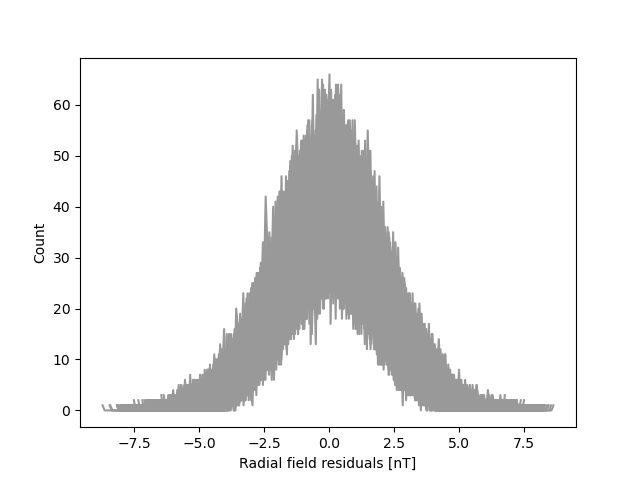

In [26]:
N_sim = 1000

core.run_sim(N_sim, core.grid_glq_N, core.C_mm_all, core.C_dd, core.C_dm_all, core.G,
        s_sat.data, core.data, scale_m_i = True, unit_d = False, collect_all = False,
        sense_running_error = True, save_string = nb_name, sim_stochastic = False)

In [27]:
core.realization_to_sh_coeff(core.r_cmb, set_nmax = 30)

In [28]:
core.covmod_lsq_equiv(s_sat.data, core.C_mm_all, core.G, core.r_cmb)

<IPython.core.display.Javascript object>


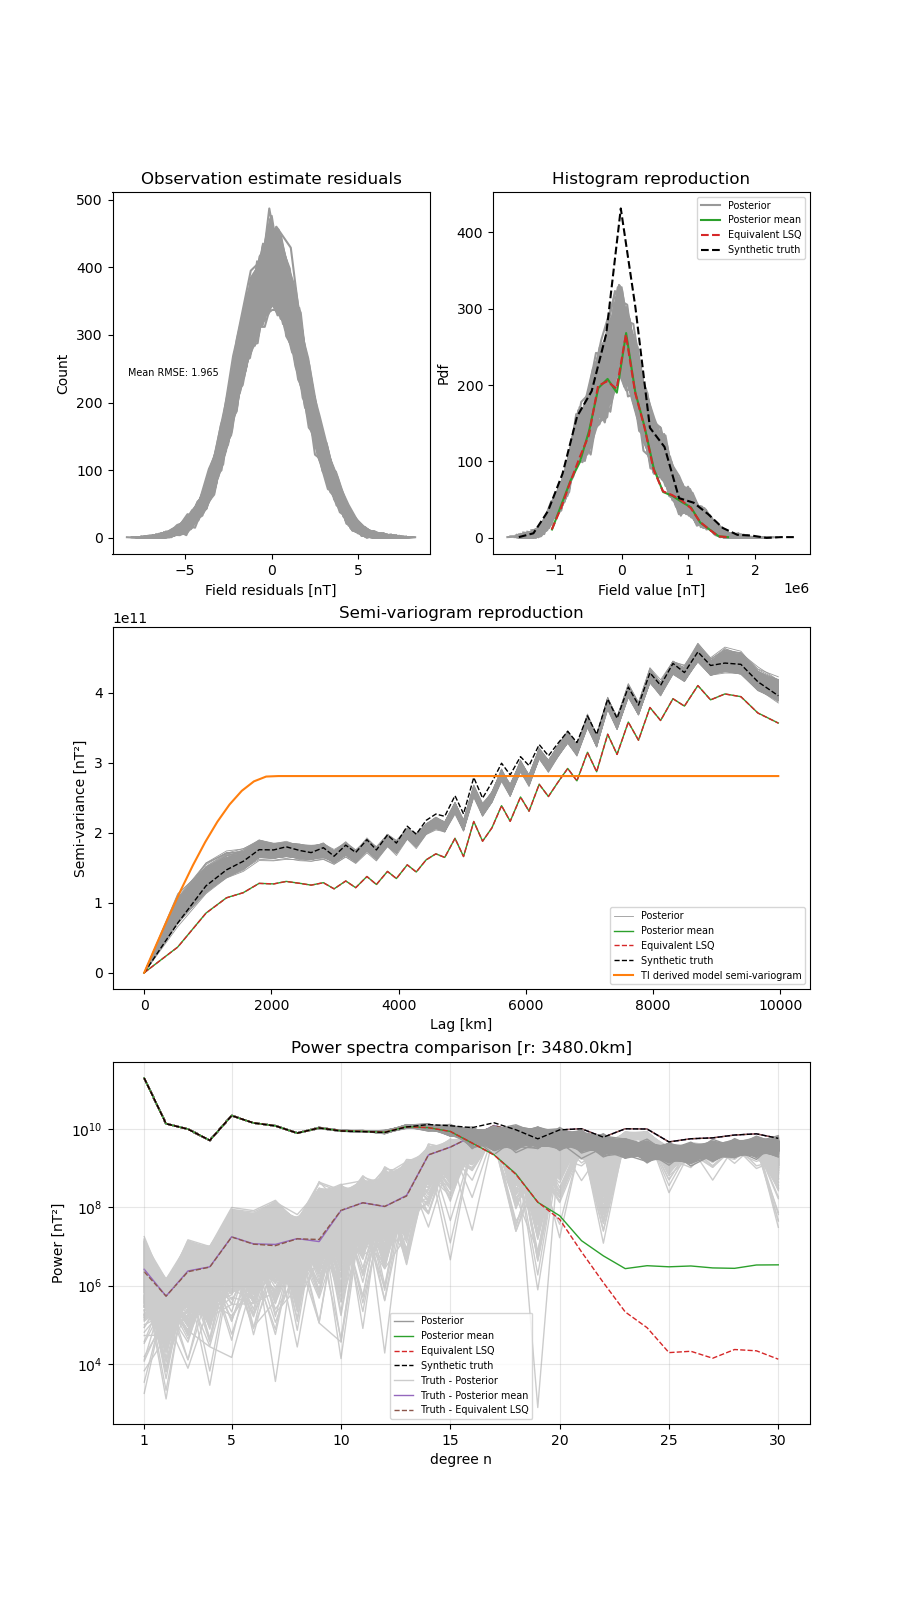

In [29]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)

core.grid_glq(nmax = 30, r_at = core.r_cmb)
mt_util.plot_sdssim_reproduce(core, core.m_DSS_res, m_equiv_lsq = core.m_equiv_lsq,
                              lags_use = 1000, spec_r_at = core.r_cmb,
                              model_dict = {}, figsize=(9,16),
                              hist_bins = 20, res_bins = 20,
                              savefig = False, save_string = "core_sh30_unconditional_compare", save_dpi = 300)

# Conditional table investigation

In [47]:
print(core)


______current attributes______

a:                     6371.2
r_sat:                 6721.2
r_cmb:                 3480.0
rad:                   0.017453292519943295
mu0:                   1.2566370614359173e-06
comment:               Finding sparsity by digging into histogram reproduction
class_abs_path:        /home/mikotz/spherical_direct_sequential_simulation
N_SH:                  30
N_SH_secondary:        None
sim_type:              core
grid_glq_zero:         (31,), Max/Min: 1.00 / -1.00
grid_glq_w_shtools:    (31,), Max/Min: 0.10 / 0.01
grid_glq_shape:        (2,), Max/Min: 61.00 / 31.00
grid_glq_w:            (1891,), Max/Min: 0.10 / 0.01
grid_glq_radial:       (1891,), Max/Min: 3480.00 / 3480.00
grid_glq_theta:        (1891,), Max/Min: 175.63 / 4.37
grid_glq_phi:          (1891,), Max/Min: 354.10 / 0.00
grid_glq_N:            1891
grid_glq_nmax:         30
r_grid:                3480.0
grid:                  (1891, 2)
sph_d:                 (1891, 1891)
lon:                 

<IPython.core.display.Javascript object>


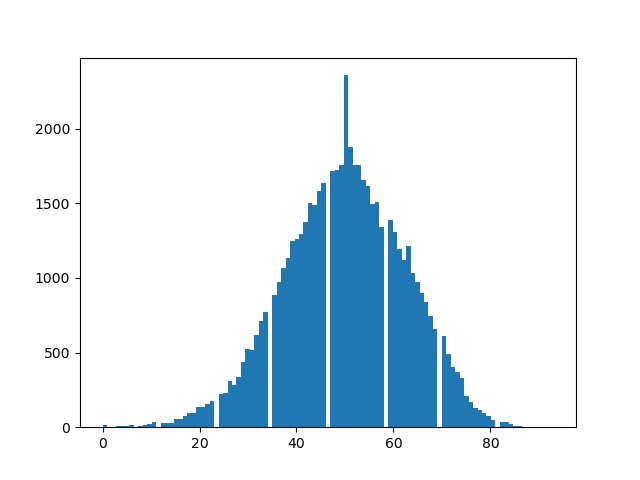

<IPython.core.display.Javascript object>


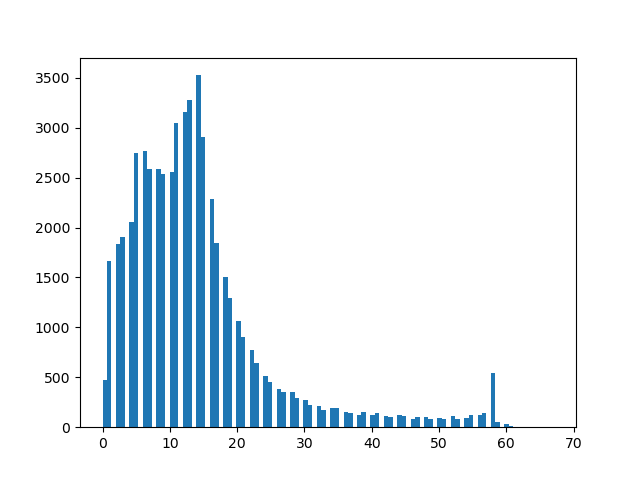

In [34]:
idx_n_hist =[]
idx_v_hist = []

for idx_n, idx_v in core.idx_nv_collect:
    idx_n_hist.append(idx_n)
    idx_v_hist.append(idx_v)


plt.figure()
plt.hist(idx_n_hist,bins=101)
plt.show()

plt.figure()
plt.hist(idx_v_hist,bins=101)
plt.show()

In [22]:
k_vs = []

for i in np.arange(0,len(core.kriging_mv_collect)):
    k_vs.append(core.kriging_mv_collect[i][1])

<IPython.core.display.Javascript object>


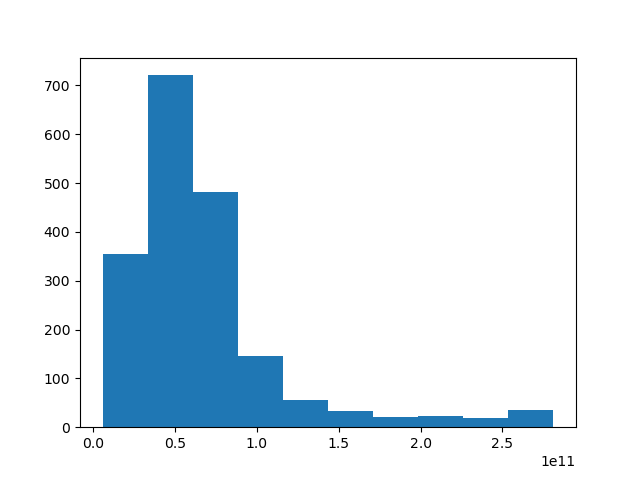

In [23]:
plt.figure()
plt.hist(k_vs)
plt.show()

# Count sampling

In [23]:
# animation
from matplotlib import animation, rc
from IPython.display import HTML, Image, display, Video
import os

In [31]:
samples_emp_QF = []
for j in np.arange(0,core.m_DSS.shape[0]):
    nv_in = core.idx_nv_collect[j]
    test_CQF_dist = core.CQF_dist[nv_in[0],nv_in[1],:]
    samples_emp_QF.append(test_CQF_dist[np.random.randint(0,core.condtab_normsize,size=1)])
    
samples_emp_QF = np.array(samples_emp_QF)

In [32]:
samples_emp_QF.shape

(1891, 1)

In [23]:
def conditional_lookup(self, mu_k, sigma_sq_k, dm, dv, scaling = True):
        #conditional_lookup(self, cond_mean, cond_var, cond_dist, cond_dist_size, mu_k, sigma_sq_k, dm, dv):
        #conditional_lookup(core.CQF_mean, core.CQF_var, core.CQF_dist, core.condtab_normsize, mu_k, sigma_sq_k, dm_c, dv_c)

        #distance = np.power((self.CQF_mean-mu_k)/dm,2)+np.power((self.CQF_var-sigma_sq_k)/dv,2)   
        #distance = np.power((self.CQF_mean-mu_k),2)+np.power((self.CQF_var-sigma_sq_k),2)        
        
        #distance = np.power((self.CQF_mean-mu_k)/dm,2)+abs(self.CQF_var-sigma_sq_k)/np.sqrt(dv)
        
        distance = abs(self.CQF_mean-mu_k)/dm+abs(self.CQF_var-sigma_sq_k)/dv # THIS ONE
        
        #distance = abs(self.CQF_mean-mu_k)+abs(self.CQF_var-sigma_sq_k)
        
        nearest = np.unravel_index(np.argmin(distance),self.CQF_mean.shape)
        idx_n = nearest[0]
        idx_v = nearest[-1]
        
        nearest_dist = self.CQF_dist[idx_n,idx_v,:]
        
        m_i = nearest_dist[np.random.randint(0,self.condtab_normsize,size=1)]

        if scaling == True:
            m_i_mean = self.CQF_mean[idx_n,idx_v]        
            m_i_std = np.sqrt(self.CQF_var[idx_n,idx_v],dtype=np.float64)
            m_k = (m_i - m_i_mean)*np.sqrt(sigma_sq_k)/m_i_std+mu_k
        else:
            m_k = m_i

        return idx_n, idx_v, nearest_dist, m_i, distance

[365]
23
18


<IPython.core.display.Javascript object>


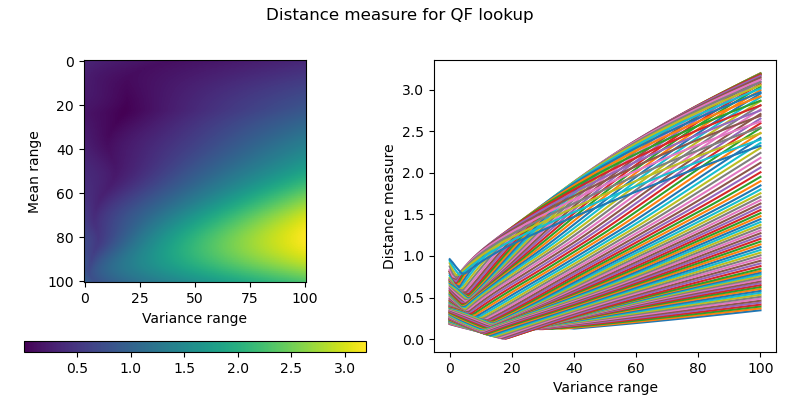

In [33]:
from matplotlib.colorbar import Colorbar

data_min = np.min(core.data)
data_max = np.max(core.data)
dm = data_max - data_min
dv = core.target_var

idx_rand_field_value = np.random.randint(0,len(core.data),size=1)
idx_n, idx_v, nearest_dist, m_i, distance = conditional_lookup(core, core.kriging_mv_collect[int(idx_rand_field_value)][0], 
                                                               core.kriging_mv_collect[int(idx_rand_field_value)][1], dm, dv)
print(idx_rand_field_value)
print(idx_n)
print(idx_v)

fig = plt.figure(figsize=(8,4), constrained_layout=False) # Initiate figure with constrained layout
fig.suptitle("Distance measure for QF lookup")

gs = fig.add_gridspec(2, 2, height_ratios=[1,0.05], width_ratios=[1,1]) # Add x-by-y grid
ax_cb = fig.add_subplot(gs[1, 0])

#% RESIDUALS
ax = fig.add_subplot(gs[0, 0])
im = ax.imshow(distance)
#cbax = plt.subplot(gs[0,0]) # Set colorbar position
cb = Colorbar(mappable = im, ax = ax_cb, orientation = "horizontal") # im, ax=ax, 
ax.set_xlabel("Variance range")
ax.set_ylabel("Mean range")
ax = fig.add_subplot(gs[:, 1])
ax.plot(distance.T)
ax.set_xlabel("Variance range")
ax.set_ylabel("Distance measure")

fig.subplots_adjust(left=0.03, bottom=0.12, right=0.97, top=0.85, wspace = 0.2, hspace=0.5)

plt.show()

In [30]:
core.grid_glq(nmax = 256, r_at = core.r_cmb)
#core.grid_glq(nmax = 120, r_at = core.r_cmb)

set_nmax = 30

core.ensemble_B(core.g_spec, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_eqa = core.B_ensemble_glq[:,0,:].copy()

#core.g_spec_mean = np.mean(core.g_spec,axis=1)
core.ensemble_B(core.g_spec_mean, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
zs_mean_eqa = core.B_ensemble_glq[:,0].copy()

core.ensemble_B(core.g_prior[:mt_util.shc_vec_len(set_nmax)], nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
prior_eqa = core.B_ensemble_glq[:,0].copy()

core.ensemble_B(core.g_lsq_equiv, nmax = set_nmax, r_at = core.r_cmb, grid_type = "glq")
lsq_eqa = core.B_ensemble_glq[:,0].copy()

<IPython.core.display.Javascript object>


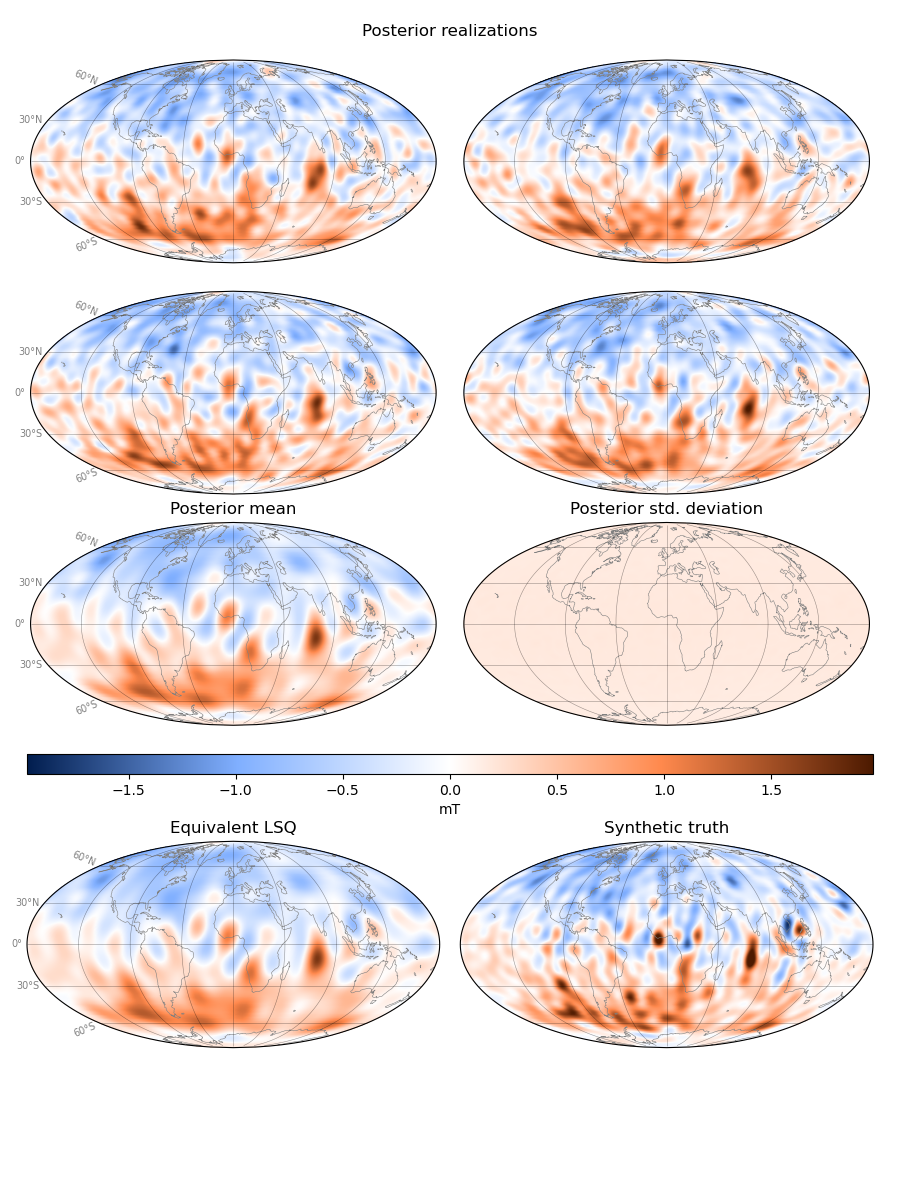

In [31]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_glq_phi, 90-core.grid_glq_theta, zs_eqa, 
                        field_compare = prior_eqa, field_lsq = lsq_eqa, field_mean = zs_mean_eqa,
                        tile_size_row = 3, tile_size_column = 2, 
                        figsize=(9,12), limit_for_SF = 10**6, point_size = 10, cbar_mm_factor = 2/3,
                        coast_width = 0.4, coast_color = "grey", unit_transform_n_to_m = True,
                        cbar_h = 0.1, cbar_text = "mT", cbar_text_color = "black",
                        left=0.03, bottom=0.12, right=0.97, top=0.95, wspace = 0.05, hspace=0.2, 
                        savefig = False, save_string = "core_sh30_unconditional_compare", 
                        projection = ccrs.Mollweide(), use_gridlines = True, 
                        gridlines_width = 0.4, gridlines_alpha = 0.4, save_dpi = 100)


In [23]:
# SAVE RESULT
#print("\nSaving job")
#file_clip = open("core_{}.obj".format(nb_name), "wb")
#pickle.dump(core, file_clip, protocol=4)
#file_clip.close()

#file_clip = open("sat_{}.obj".format(nb_name), "wb")
#pickle.dump(s_sat, file_clip, protocol=4)
#file_clip.close()
#print("\nJob saved and finished")